# **[das-plotly](https://dash.plotly.com/minimal-app)**

In [ ]:
! pip install dash

### from dash import Dash, html, dcc, callback, Output, Input:

Imports the necessary components from the Dash library. Dash is the main class for creating the Dash application. html and dcc (Dash Core Components) are used to create HTML and interactive components. callback, Output, and Input are used for setting up reactive callbacks.
import plotly.express as px:

Imports the Plotly Express module for concise, high-level functions to create complex visualizations quickly.
import pandas as pd:

Imports the pandas library, a powerful data manipulation and analysis tool. df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder_unfiltered.csv'):

In [ ]:
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder_unfiltered.csv')
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
3308,Zimbabwe,Africa,1987,62.351,9216418,706.157306
3309,Zimbabwe,Africa,1992,60.377,10704340,693.420786
3310,Zimbabwe,Africa,1997,46.809,11404948,792.449960
3311,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [ ]:
# Initializes a new Dash application.
app = Dash(__name__)

In [ ]:
app

In [ ]:
# dash_start.ipynb의 이름
print(__name__)

__main__


- Defines the layout of the app using a Div element, which is a container that can hold other HTML and Dash components. The layout includes:
> - A centered H1 header displaying "Title of Dash App".
> - A dropdown component (dcc.Dropdown) that lists all unique countries from the dataset as selectable options, with 'Canada' as the default selected.
> - A graph component (dcc.Graph) where the visualization will be displayed.

In [ ]:
app.layout = html.Div([
    html.H1(children='Title of Dash App', style={'textAlign':'center'}),

    dcc.Dropdown(df.country.unique(), 'Canada', id='dropdown-selection'), # callback decorator의 'dropdown' input 인자로 df의 value

    dcc.Graph(id='graph-content') # callback decorator의 'graph' output 인자로 figure
])

- 맨 아래로 이동하여 "python data science handbook
- python의 모든 object(객체)
- 그림의 바탕(도화지)과 축도 class로 object(객체)

### A decorator to define a callback function, specifying how data and user input should trigger updates in the app.
- Callbacks in Dash are functions that are automatically called in response to changes in input components. Output('graph-content', 'figure'), Input('dropdown-selection', 'value'):
- Specifies the output and input of the callback. The output is the figure attribute of the component with ID 'graph-content', and the input is the value of the dropdown menu.
> - Output: Specifies which component and property should be updated whenever the callback is triggered.
>> - 'graph-content': The ID of the Dash component that will receive the output of the callback. In this case, it's the dcc.Graph component where the graph is displayed.
>> - 'figure': The property of the component to update. Here, it refers to the graphical figure (plot) displayed in the dcc.Graph. Essentially, this tells Dash that the output of the callback function should be used as the new figure of the graph.
>- Input: Specifies which component and property will trigger the callback when changed.
>> - 'dropdown-selection': The ID of the component that acts as the input trigger. This is the dcc.Dropdown where users select a country.
>> - 'value': The property of the dropdown that triggers the callback when it changes. This property holds the current value selected in the dropdown, i.e., the selected country.

- def update_graph(value):

> - Defines the callback function, which updates the graph based on the selected country from the dropdown.
dff = df[df.country==value]:

>- Filters the main DataFrame df to only include rows where the 'country' column matches the selected value from the dropdown.
return px.line(dff, x='year', y='pop'):

>- Returns a line plot created with Plotly Express, showing the population ('pop') over the years ('year') for the selected country.

In [ ]:
@callback(
    Output('graph-content', 'figure'),       # output
    Input('dropdown-selection', 'value')     # input
)

def update_graph(value):
    dff = df[df.country==value]
    return px.line(dff, x='year', y='pop')

In [ ]:
# run this script

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

- How It Works
> - When a user selects a country from the dropdown, the value property of the dcc.Dropdown component changes.
> - This change triggers the callback function associated with it. The new value of the dropdown (the selected country) is passed as an argument to the callback function.
> - The callback function (update_graph) uses this value to filter the dataset and update the graph accordingly. It creates a new figure based on the filtered data and returns this figure.
> - The returned figure is then automatically rendered in the dcc.Graph component, updating the visualization to reflect the population trends of the selected country.

- Conclusion
> This callback mechanism allows Dash apps to be highly interactive and responsive, as changes in user inputs directly and dynamically update the outputs. Understanding this flow is crucial for designing and implementing effective interactive applications with Dash.

## **Digress**

### <font color='red'> **data visualization show time**
- Perhaps the simplest of all plots is the visualization of a single function $y=f(x)$
- refer to [Python Data Science Handbook
, 4. Visualization with Matplotlib
Simple Line Plots](https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html)

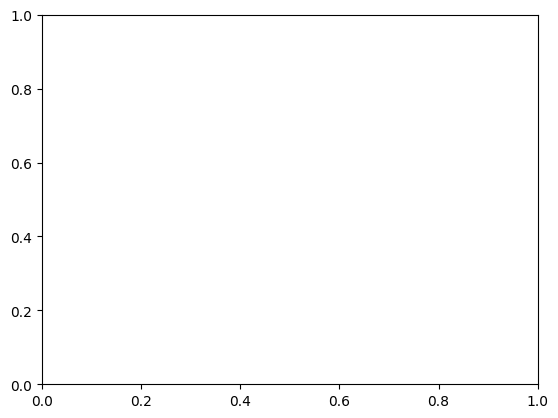

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()

- In Matplotlib, the figure (an instance of the class plt.Figure) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. The axes (an instance of the class plt.Axes) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization. > >
> I use the variable name fig to refer to a figure instance, and ax to refer to an axes instance or group of axes instances.
> Once we have created an axes, we can use the ax.plot function to plot some data. Let's start with a simple sinusoid:

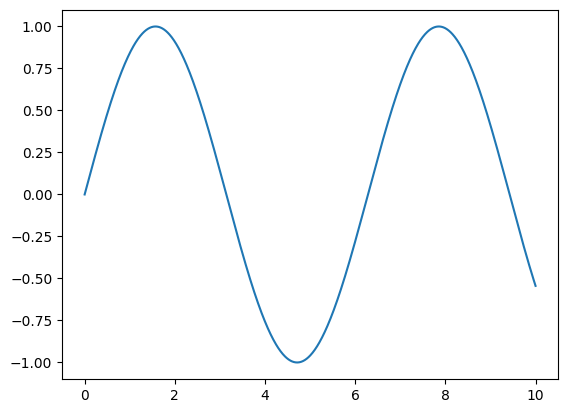

In [ ]:
fig = plt.figure()
ax = plt.axes()

import numpy as np
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

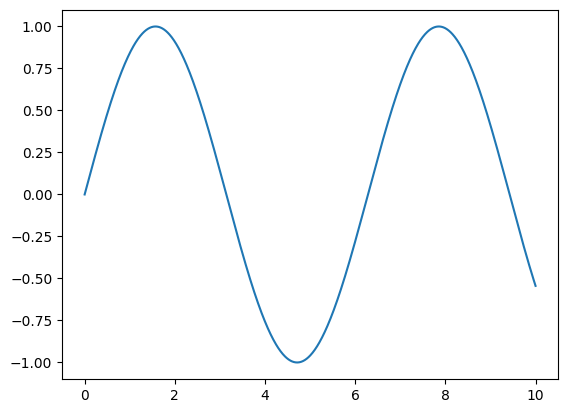

In [ ]:
plt.plot(x, np.sin(x))

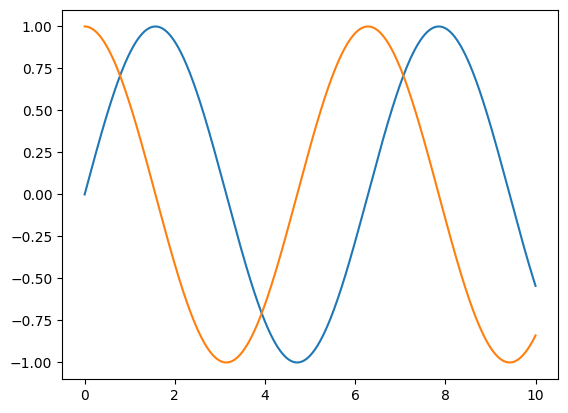

In [ ]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

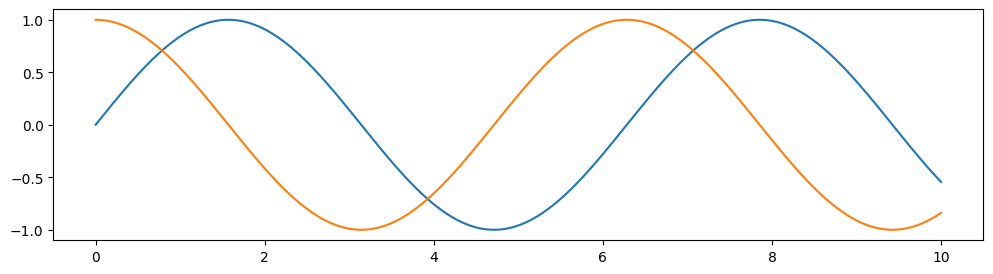

In [ ]:
fig = plt.figure(figsize=(12, 3))
ax = plt.axes()
plt.plot(x, np.sin(x)); plt.plot(x, np.cos(x))

<ipython-input-51-ab98285e43ff>:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



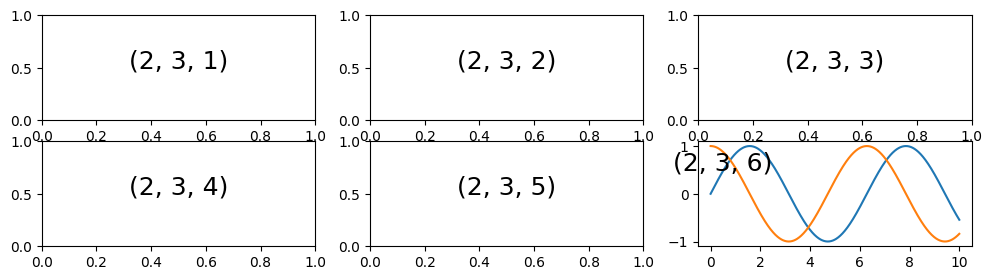

In [ ]:
fig = plt.figure(figsize=(12, 3))
ax = plt.axes()
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

### <font color='red'> **data visualization show time finish**